[custom date parser for reading csv](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e)
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
custom_date_parser = lambda x: datetime.strptime(str(x), "%Y%m%d")

In [9]:
lib = "polars"  # "pandas"  # 
suffix = "pd" if lib == "pandas" else "pl"
file_csv = f'spy-rsi-{lib}.csv'
df = pd.read_csv(file_csv, parse_dates=['date_'], date_parser=custom_date_parser)

In [10]:
df.set_index("date_", inplace=True)

In [11]:
df

,wp,rsi_old,rsi
date_,,,
2005-02-25,97.2620,NaN,NaN
2005-02-28,96.8306,NaN,NaN
2005-03-01,97.2774,NaN,NaN
2005-03-02,97.3049,NaN,NaN
2005-03-03,97.3315,NaN,NaN
...,...,...,...
2023-02-06,409.7625,1.0821,-0.104194
2023-02-07,413.6100,1.7758,2.447531
2023-02-08,411.4400,1.1510,2.300658


In [12]:
def plot_rsi(df, etf_ticker="SPY", has_grid=True, suffix="pl"):
    fig = plt.figure()
    fig.set_figwidth(12)
    fig.set_figheight(8)
    fig.tight_layout()
    ax_wp = fig.add_axes([0.1, 0.5, 0.85, 0.40], xticklabels=[])
    ax_rsi = fig.add_axes([0.1, 0.1, 0.85, 0.40])
    etf_ticker = "SPY"
    max_date = df.iloc[-1].name.strftime("%Y-%m-%d")
    min_date = df.iloc[0].name.strftime("%Y-%m-%d")
    
    ax_wp.set_title(f"RSI:     ( {min_date} , {max_date} )")
    ax_wp.set_ylabel(f"{etf_ticker}")
    df["wp"].plot(ax=ax_wp, color="b", grid=has_grid)

    rsi_max = max(np.nanmax(df['rsi']), np.nanmax(df['rsi_old']))
    rsi_min = min(np.nanmin(df['rsi']), np.nanmin(df['rsi_old']))
    ax_rsi.set_ylabel("RSI / RSI(old)")
    df["rsi"].plot(ax=ax_rsi, color="b", ylim=(rsi_min, rsi_max))
    df["rsi_old"].plot(ax=ax_rsi, color="r", style="-.", ylim=(rsi_min, rsi_max))
    ax_rsi.grid('off', which='minor', axis='x' )
    ax_rsi.grid('on', which='major', axis='x' )
    ax_rsi.hlines(y=0.0, xmin=min_date, xmax=max_date, linewidth=2,  color='g')
    
    file_img = f"{etf_ticker}_{max_date}-{suffix}.png"
    fig.savefig(file_img)

-341 : -1
-681 : -341
-1021 : -681
-1361 : -1021
-1701 : -1361
-2041 : -1701
-2381 : -2041
-2721 : -2381
-3061 : -2721
-3401 : -3061
-3741 : -3401
-4081 : -3741
-4421 : -4081
-4761 : -4421


C:\Users\p2p2l\AppData\Local\Temp\ipykernel_6160\2456081692.py:16: RuntimeWarning: All-NaN axis encountered
  rsi_max = max(np.nanmax(df['rsi']), np.nanmax(df['rsi_old']))
C:\Users\p2p2l\AppData\Local\Temp\ipykernel_6160\2456081692.py:17: RuntimeWarning: All-NaN axis encountered
  rsi_min = min(np.nanmin(df['rsi']), np.nanmin(df['rsi_old']))


Axis limits cannot be NaN or Inf


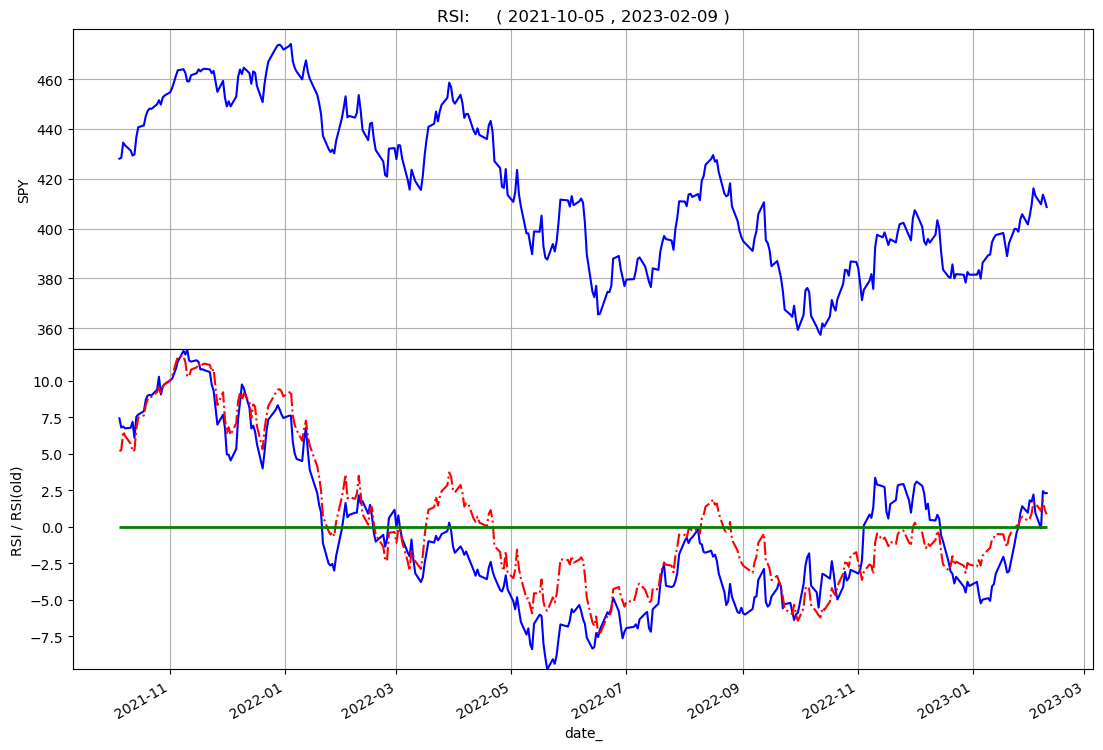

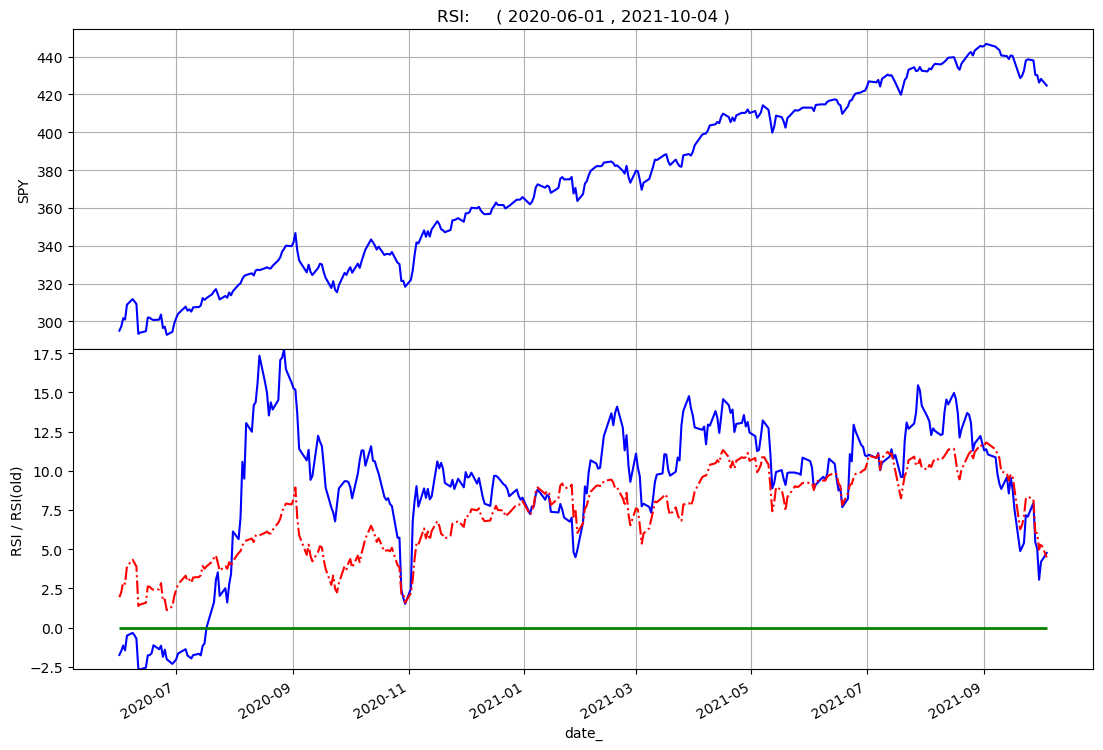

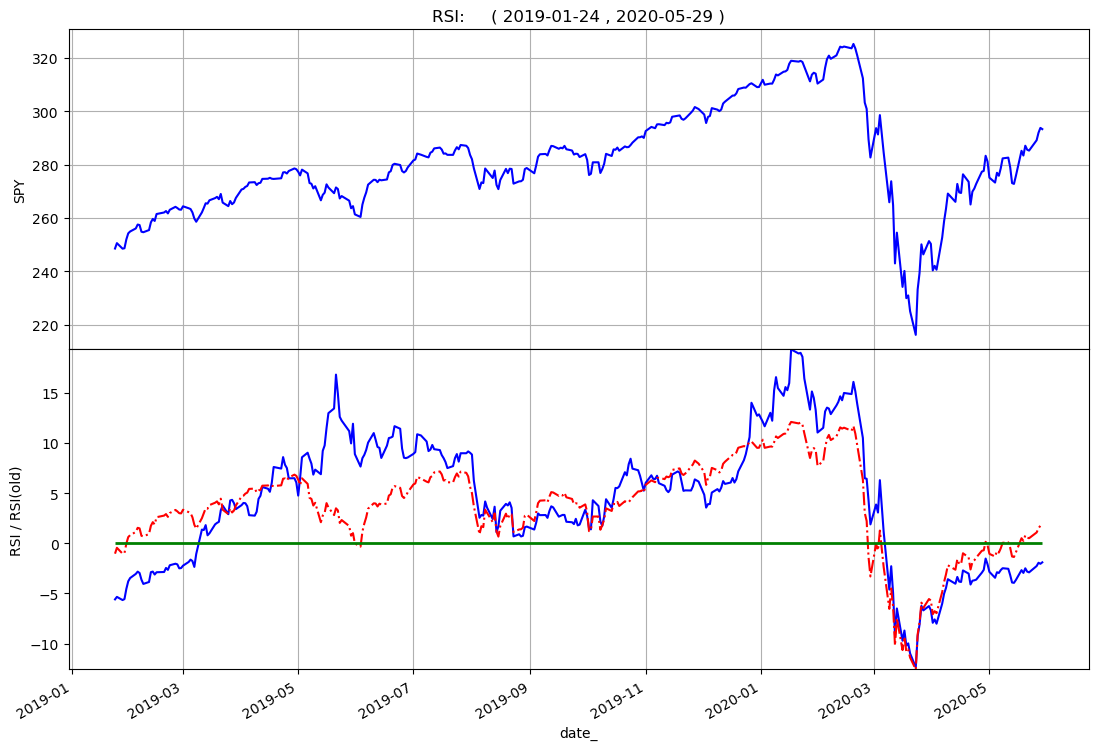

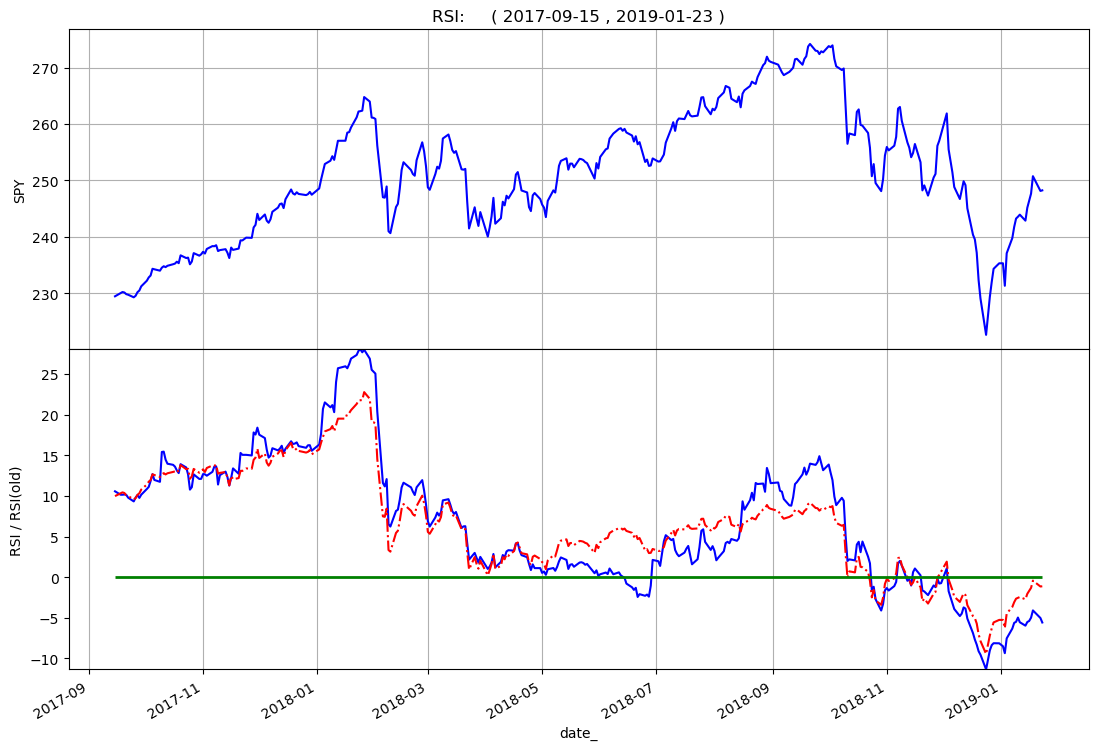

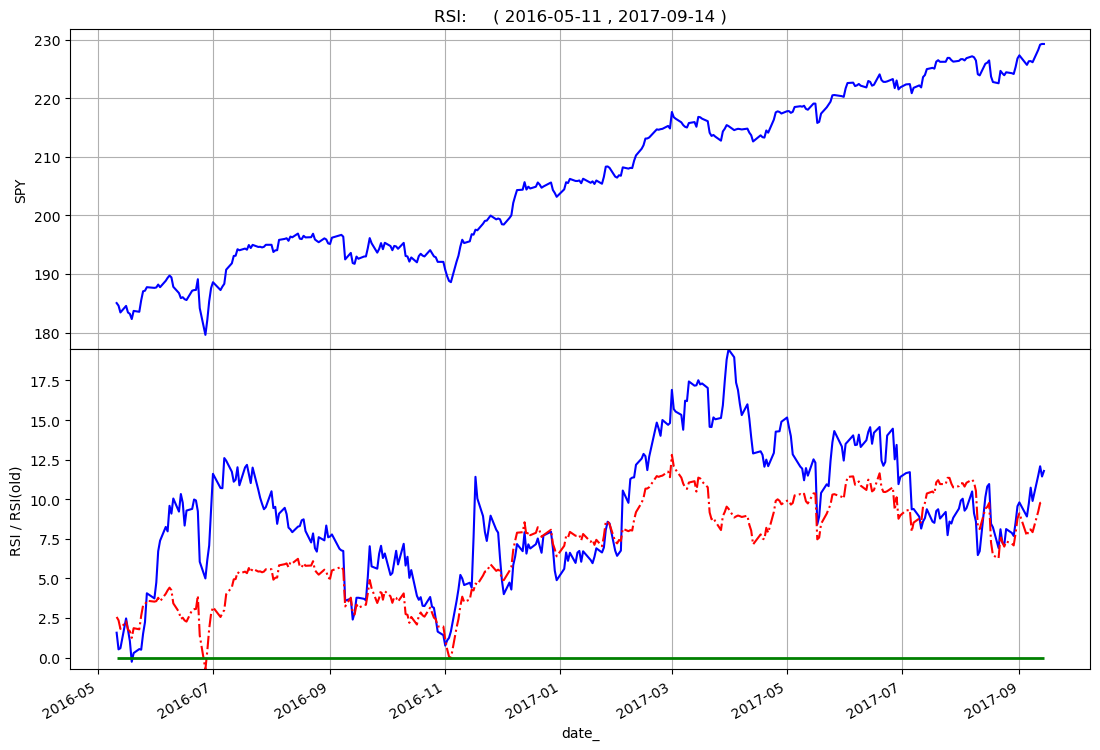

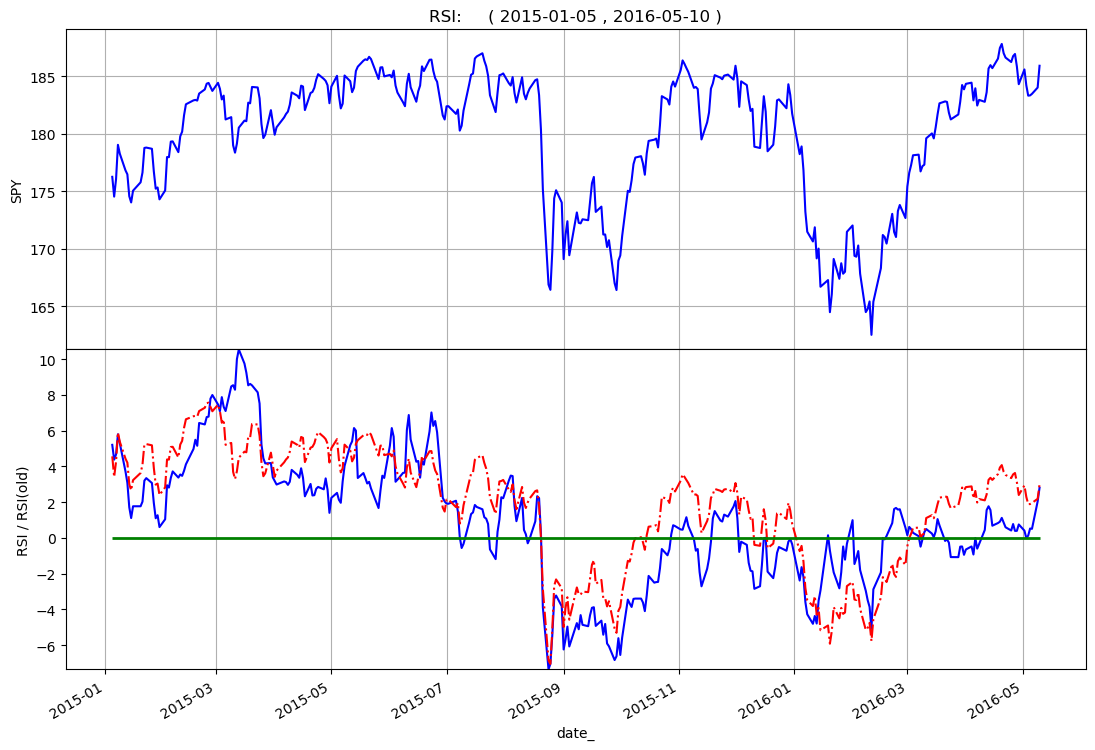

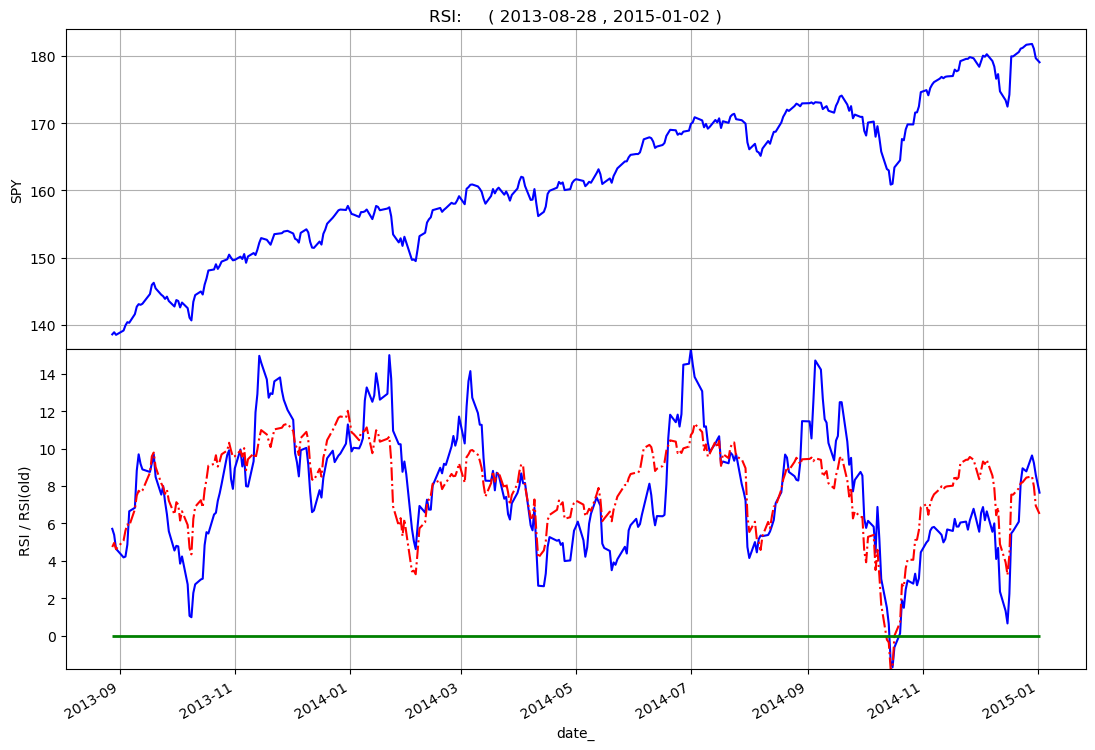

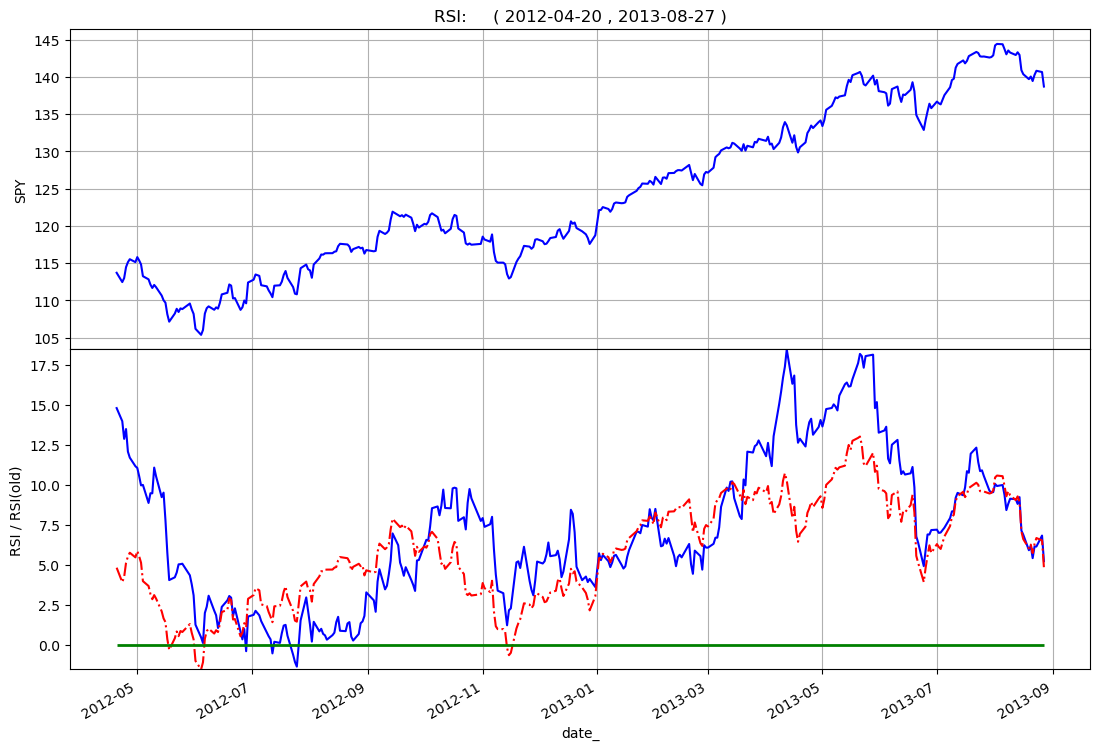

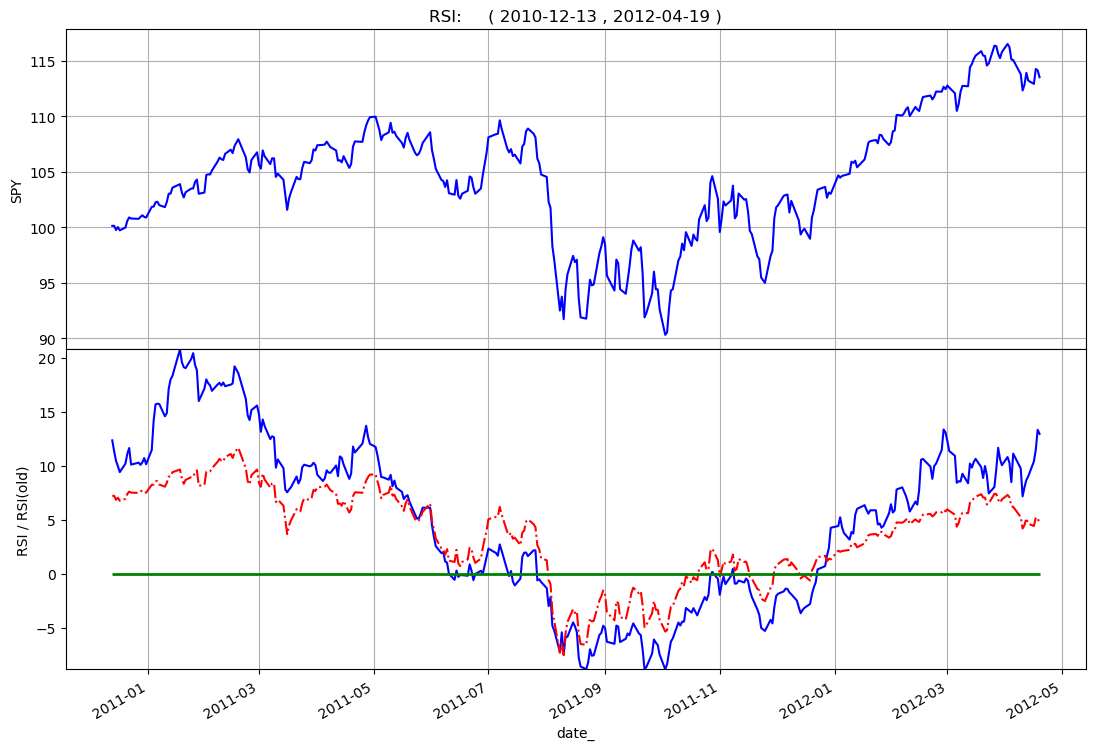

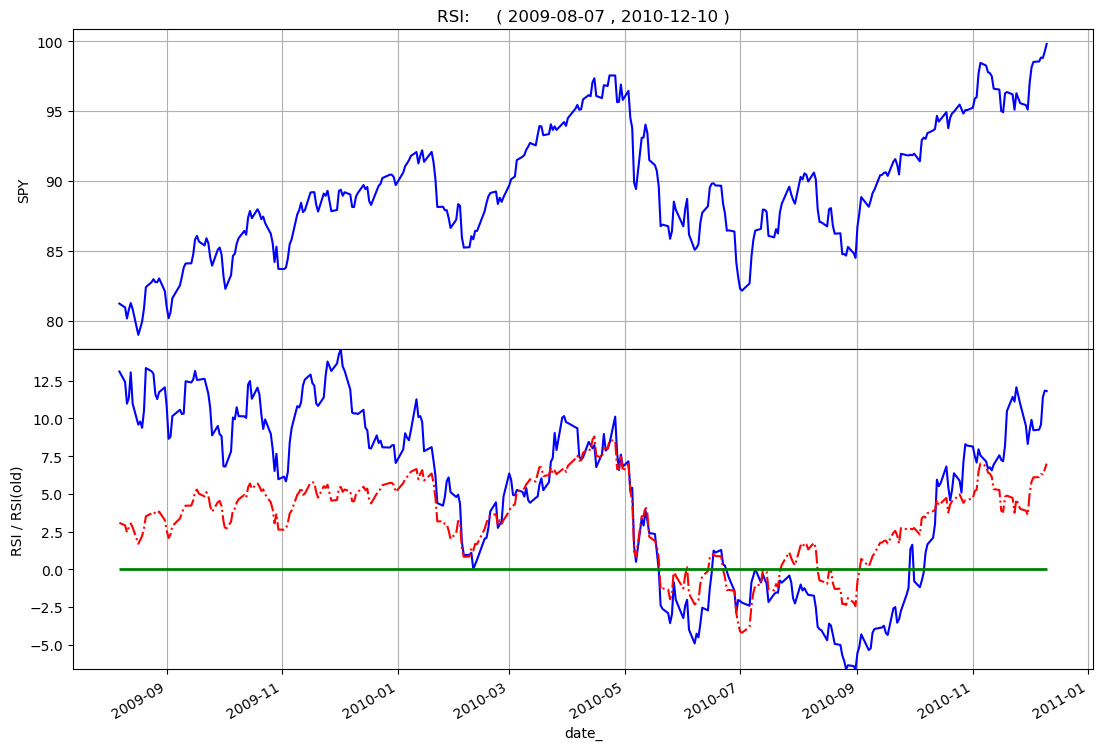

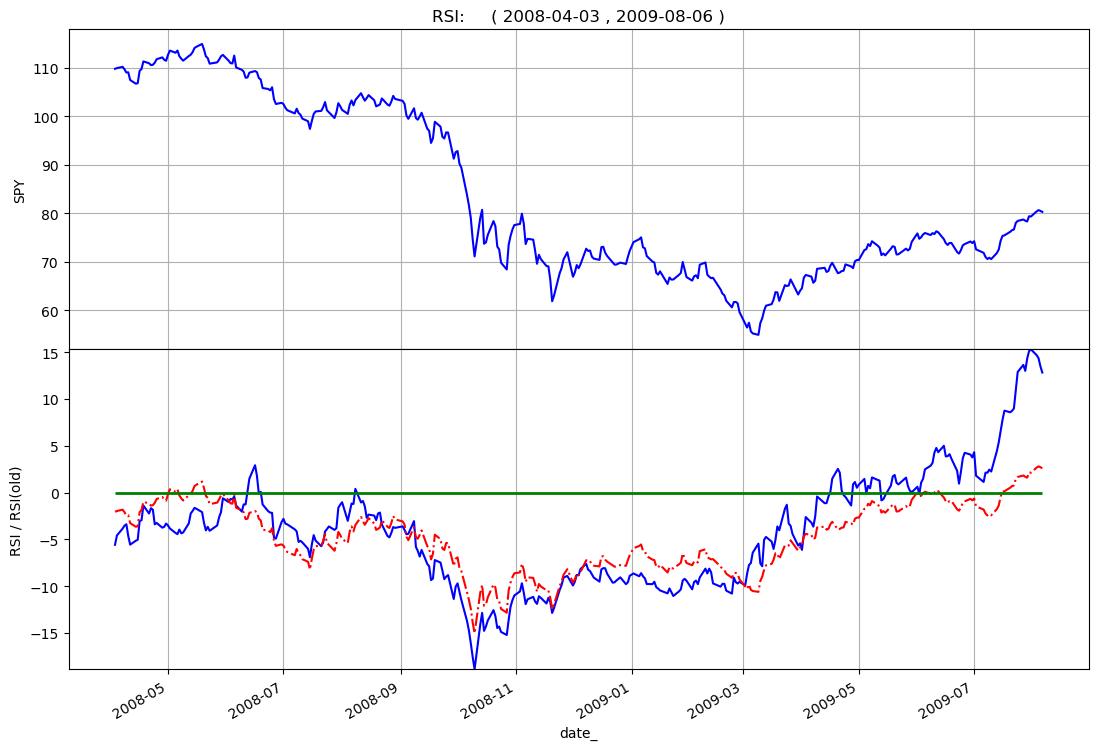

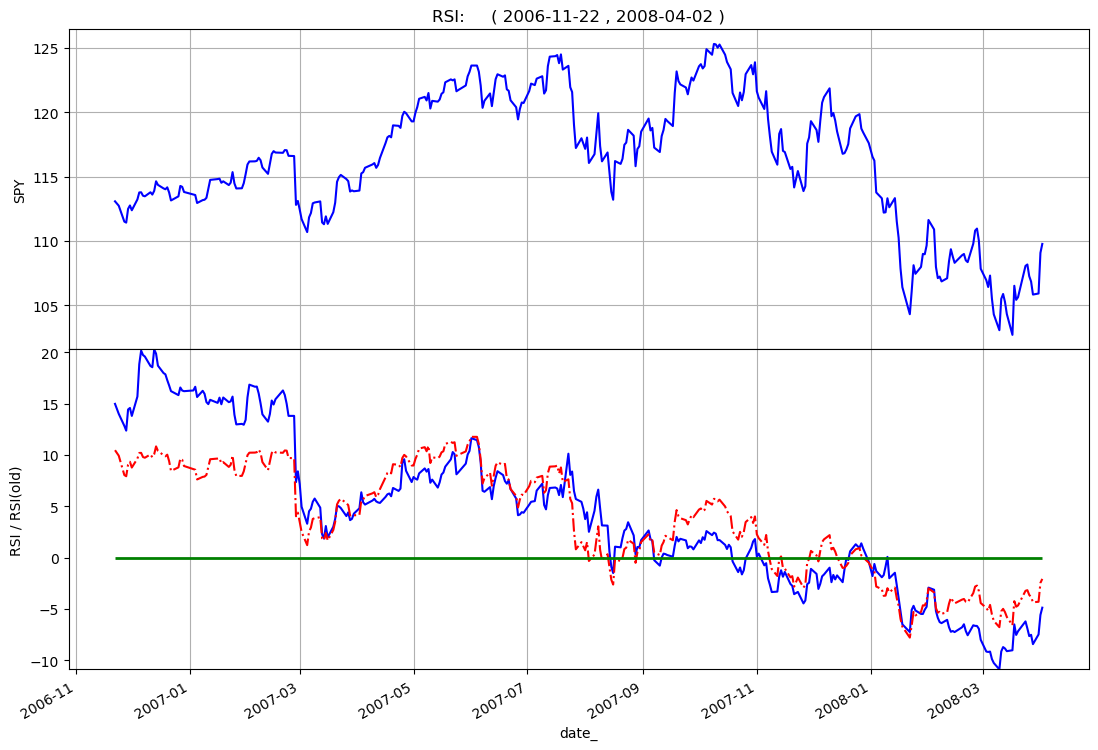

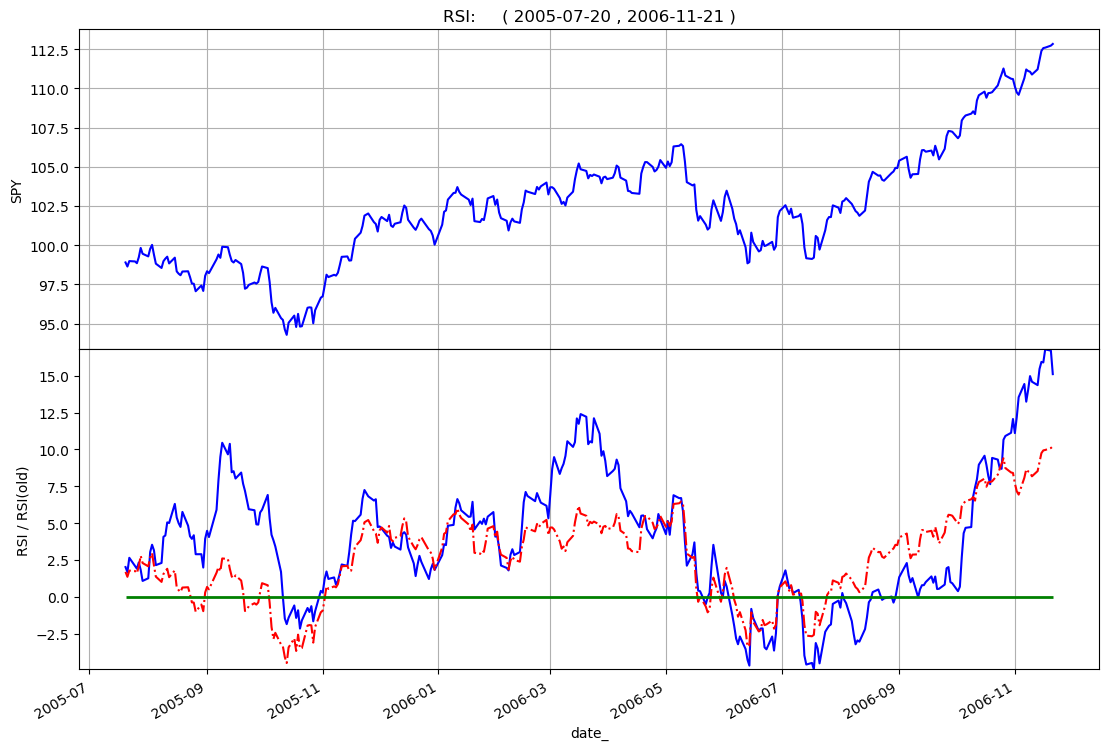

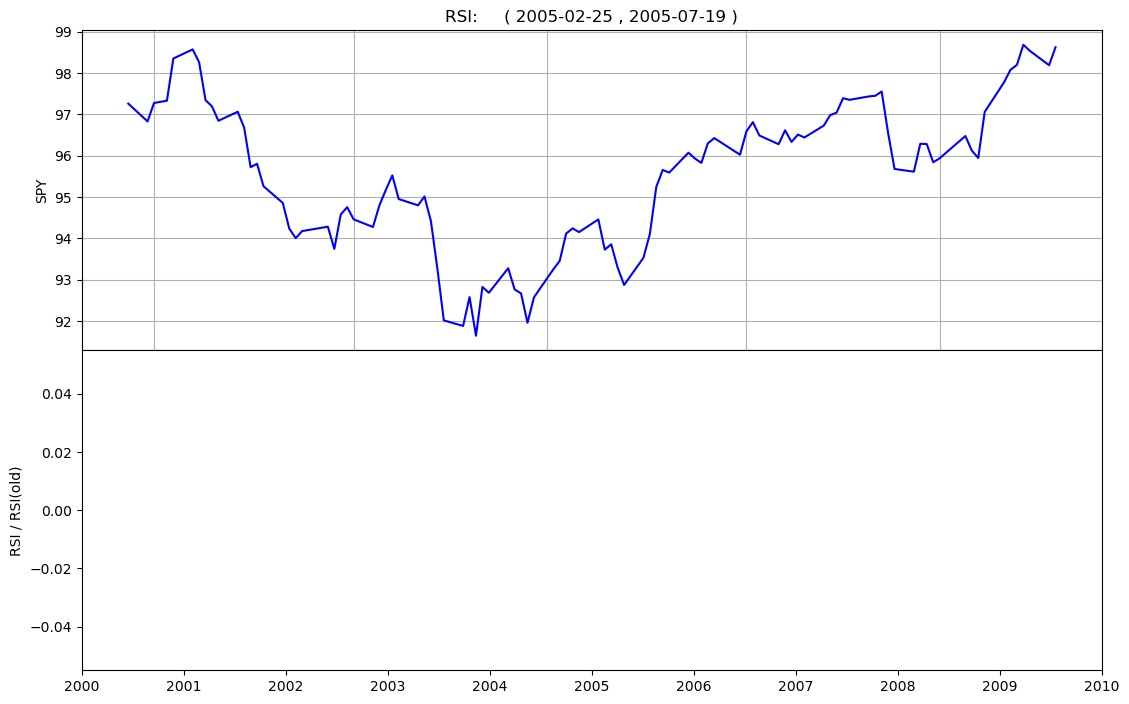

In [13]:
interval = 340
DEBUG = False # True
n = 0
for i in range(1, df.shape[0], interval):
    n += 1
    if DEBUG and n > 1: continue
    n_sp = -i
    n_st = -i - interval
    print(f"{n_st} : {n_sp}")
    try:
        plot_rsi(df[n_st:n_sp], suffix=suffix)
    except Exception as e: 
        print(str(e))

In [8]:
!dir *.png

 Volume in drive C is Windows
 Volume Serial Number is 6EA7-3DCA

 Directory of C:\Users\p2p2l\projects\wgong\py4kids\lesson-14.9-vis\matplotlib

02/19/2023  10:20 AM           103,891 SPY_2006-11-21-pd.png
02/18/2023  11:02 PM           106,534 SPY_2006-11-21.png
02/19/2023  10:20 AM            98,805 SPY_2008-04-02-pd.png
02/18/2023  11:02 PM            99,711 SPY_2008-04-02.png
02/19/2023  10:20 AM            87,887 SPY_2009-08-06-pd.png
02/18/2023  11:02 PM            88,229 SPY_2009-08-06.png
02/19/2023  10:20 AM           104,605 SPY_2010-12-10-pd.png
02/18/2023  11:02 PM           106,574 SPY_2010-12-10.png
02/19/2023  10:20 AM            97,244 SPY_2012-04-19-pd.png
02/18/2023  11:02 PM            98,550 SPY_2012-04-19.png
02/19/2023  10:20 AM           101,314 SPY_2013-08-27-pd.png
02/18/2023  11:02 PM           104,430 SPY_2013-08-27.png
02/19/2023  10:20 AM           103,166 SPY_2015-01-02-pd.png
02/18/2023  11:02 PM           106,572 SPY_2015-01-02.png
02/19/2023  10:20 AM 